<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_Class_14_ajuste_Antoine_DifferentialEvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution
from sklearn.metrics import r2_score

In [2]:
def Minimo(x):
  A = x[0]
  B = x[1]
  C = x[2]
  P = [1,5,10,20,40,60,100,200,400,760]
  T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
  Num =10 # Num = len(P)
  Soma = 0

  for i in range(Num):
    TC = T[i]
    Pcal = np.exp( (A - B/ (TC+C)))
    Ptrue =P[i]
    Soma = Soma + (Ptrue-Pcal)**2

  return Soma

In [3]:
bounds = [(0,100), (0, 3000), (0, 1000)]
Resultado = differential_evolution(Minimo, bounds,maxiter=6000, popsize= 200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [4]:
print('fun=',Resultado.fun)
print('resposta=',Resultado.x)

fun= 15.964840249867391
resposta= [  15.23144152 2424.6129714   201.87891389]


In [5]:
Resultado.x

array([  15.23144152, 2424.6129714 ,  201.87891389])

In [6]:
w = Resultado.x
A = w[0]
B = w[1]
C = w[2]
Pcalc = []

# A, B, C = Resultado.x
P = [1,5,10,20,40,60,100,200,400,760]
T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
Num =10

for i in range(Num):
  TC =T[i]
  Pi = np.exp((A - B/ (TC+C)))
  Pcalc.append(Pi)


(0.0, 800.0)

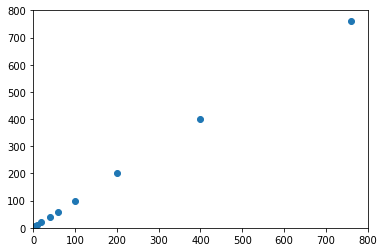

In [7]:
plt.scatter(P,Pcalc)
plt.xlim([0,800])
plt.ylim([0,800])

In [8]:
pd.DataFrame({'Ptrue':P,'Pcalc':Pcalc})

,Ptrue,Pcalc
0,1,1.737998
1,5,6.887974
2,10,12.130455
3,20,21.423954
4,40,38.742801
5,60,58.700762
6,100,99.106054
7,200,199.879734
8,400,401.047013
9,760,759.667046


In [9]:
r2_mod = r2_score(P,Pcalc)
print('R^2 =', r2_mod)

R^2 = 0.9999703588751784
